In [96]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [97]:
import pandas as pd

data_path = '../titanic/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'PassengerId')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'PassengerId')
submission = pd.read_csv(data_path + 'gender_submission.csv' , index_col= 'PassengerId')

In [98]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [99]:
all_data = pd.concat([train,test]) # 훈련 데이터와 테스트 데이터 합치기
all_data = all_data.drop('Survived' , axis = 1) # 타깃값 제거
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [100]:
binary_col = []
object_col = []

for i in all_data.columns.tolist():
    if all_data[i].dtype in ['int64' , 'float64']:
        binary_col.append(i)
    else:
        object_col.append(i)

In [101]:
all_data[binary_col]

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
...,...,...,...,...,...
1305,3,NaN,0,0,8.0500
1306,1,39.0,0,0,108.9000
1307,3,38.5,0,0,7.2500


In [102]:
all_data[binary_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1309 non-null   int64  
 1   Age     1046 non-null   float64
 2   SibSp   1309 non-null   int64  
 3   Parch   1309 non-null   int64  
 4   Fare    1308 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 61.4 KB


In [103]:
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## 성능 개선 없이 그냥 베이스라인 모델 돌려보기

In [104]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성

all_data_encoded = encoder.fit_transform(all_data)

all_data_encoded

<1309x2828 sparse matrix of type '<class 'numpy.float64'>'
	with 13090 stored elements in Compressed Sparse Row format>

### 데이터 나누기

In [105]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train = all_data_encoded[:num_train] # 0~num_train -1 행
X_test = all_data_encoded[num_train:] # num_train ~ 마지막 행

y = train['Survived']

In [106]:
from sklearn.model_selection import train_test_split

# 훈련 데이터 , 검증 데이터 분리

X_train , X_valid , y_train , y_valid = train_test_split(X_train , y , test_size=0.1 , stratify=y,random_state=10)

# test_size 는 검증 데이터 크기를 지정하는 파라미터이다.
# 값이 정수면 검증 데이터의 개수를 , 실수면 비율을 의미한다. 여기서는 0.1을 전달했으므로 10%를 검증 데이터로 분리하겠다는 의미이다.

# stratify 파라미터를 지정하지 않으면 훈련 데이터와 검증 데이터에 타깃값이 불균형하게 분포 될 수 있다.

### 모델 훈련

In [107]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 1000 , random_state=42)
logistic_model.fit(X_train,y_train) # 모델 훈련

LogisticRegression(max_iter=1000, random_state=42)

# 모델 성능 검증

- predict()는 타깃값 자체를 예측한다.

- predict_proba()는 타깃값의 확률(0일 확률과 1일 확률)을 예측한다.

In [108]:
logistic_model.predict_proba(X_valid)

array([[0.853, 0.147],
       [0.553, 0.447],
       [0.839, 0.161],
       [0.838, 0.162],
       [0.795, 0.205],
       [0.889, 0.111],
       [0.36 , 0.64 ],
       [0.097, 0.903],
       [0.942, 0.058],
       [0.744, 0.256],
       [0.868, 0.132],
       [0.949, 0.051],
       [0.101, 0.899],
       [0.971, 0.029],
       [0.962, 0.038],
       [0.599, 0.401],
       [0.933, 0.067],
       [0.268, 0.732],
       [0.139, 0.861],
       [0.95 , 0.05 ],
       [0.932, 0.068],
       [0.035, 0.965],
       [0.02 , 0.98 ],
       [0.882, 0.118],
       [0.928, 0.072],
       [0.535, 0.465],
       [0.619, 0.381],
       [0.83 , 0.17 ],
       [0.342, 0.658],
       [0.178, 0.822],
       [0.646, 0.354],
       [0.047, 0.953],
       [0.947, 0.053],
       [0.933, 0.067],
       [0.072, 0.928],
       [0.688, 0.312],
       [0.901, 0.099],
       [0.651, 0.349],
       [0.729, 0.271],
       [0.617, 0.383],
       [0.92 , 0.08 ],
       [0.365, 0.635],
       [0.613, 0.387],
       [0.7

In [109]:
logistic_model.predict(X_valid)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1], dtype=int64)

In [110]:
# 검증 데이터를 활용한 타깃 예측

y_valid_preds = logistic_model.predict_proba(X_valid)[:,1]

In [111]:
from sklearn.metrics import roc_auc_score # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC

roc_auc = roc_auc_score(y_valid , y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')

검증 데이터 ROC AUC : 0.8395


In [112]:
# 타깃값 1일 확룰 예측

y_preds= logistic_model.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [113]:
# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv('submission_1.csv')

## 성능 개선 -> 피처 엔지니어링

In [114]:
all_data_bin = all_data[binary_col].fillna(all_data[binary_col].mode().iloc[0]) # NaN 값 제일 많은값으로 대체

all_data_bin

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
...,...,...,...,...,...
1305,3,24.0,0,0,8.0500
1306,1,39.0,0,0,108.9000
1307,3,38.5,0,0,7.2500


In [115]:
object_col = ['Name' , 'Sex' , 'Ticket' , 'Embarked']
object_col
all_data_obj = all_data[object_col].fillna(all_data[object_col].mode().iloc[0])
all_data_obj
# NaN 값 제일 많은값으로 대체인데, train[object_col]에는 NaN값 특히 Cabin에 있다. ==> Cabin값은 빼는게 낫지 않을까?

,Name,Sex,Ticket,Embarked
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
1305,"Spector, Mr. Woolf",male,A.5. 3236,S
1306,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C
1307,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,S


In [116]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 타깃값 분포

In [117]:
def write_percent(ax , total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율


        # (x, y) 좌표에 텍스트 입력
        ax.text(x= left_coord + width/2.0 ,   # x축 위치
                y = height + total_size*0.001, #y축 위치
                s = f'{percent : 1.1f}%', # 입력 텍스트
                ha = 'center') #가운데 정렬



# plt.figure(figsize=(7,6))
# train_bin['Survival'] = train['Survived'].map({0: '사망', 1: '생존'})
# ax = sns.countplot(x='Survival' , data = train_bin)
# write_percent(ax , len(train)) # 비율 표시
# ax.set_title('타이타닉 호 생존자')

## 연속형 피처 분포

In [118]:
all_data_bin

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,71.2833
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
...,...,...,...,...,...
1305,3,24.0,0,0,8.0500
1306,1,39.0,0,0,108.9000
1307,3,38.5,0,0,7.2500


## 명목형 자료에 대해 계급간격 공식을 이용하여 범주화 시키기

- https://knowallworld.tistory.com/197

[1225   46   34    0]
[  0.    102.466 204.932 307.398 409.863]


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

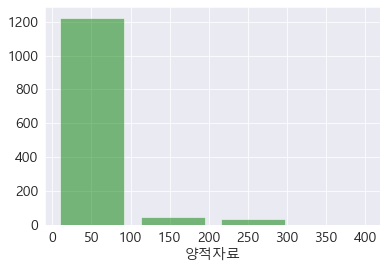

In [119]:
width = (max(all_data_bin['Fare']) - min(all_data_bin['Fare'])) / 5 #계급 간격 구하는 공식
bins = np.arange(min(all_data_bin['Fare']), max(all_data_bin['Fare']), width)


hist, bins = np.histogram(all_data_bin['Fare'], bins)
print(hist)
print(bins)

plt.hist(all_data_bin['Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [120]:
# PClass 등급별 Fare 중앙값(median) 계산
fare_medians = all_data_bin[all_data_bin['Fare'] != 0].groupby('Pclass')['Fare'].median()
# fare_medians
# Fare 값이 0인 데이터를 PClass 등급에 따라 중앙값으로 채우기
for i, row in all_data_bin.iterrows():
    if row['Fare'] == 0:
        all_data_bin.at[i, 'Fare'] = fare_medians[row['Pclass']]

# 결과 확인
all_data_bin.loc[816:824]

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
816,1,24.0,0,0,61.3792
817,3,23.0,0,0,7.9250
818,2,31.0,1,1,37.0042
819,3,43.0,0,0,6.4500
820,3,10.0,3,2,27.9000
821,1,52.0,1,1,93.5000
822,3,27.0,0,0,8.6625
823,1,38.0,0,0,61.3792
824,3,27.0,0,1,12.4750


In [121]:
all_data_bin['log_Fare'] = np.log(all_data_bin['Fare'])
min_log_fare = min(all_data_bin['log_Fare'])
min_log_fare_row = all_data_bin[all_data_bin['log_Fare'] == min_log_fare]
print(min_log_fare_row)
# 제일 log_Fare 값이 작은 열 출력




             Pclass  Age  SibSp  Parch    Fare  log_Fare
PassengerId                                             
913               3  9.0      0      1  3.1708  1.153984


width : 1.0169966930385597
6.238967387173662
1.1539839219808636
hist : [445 370 325 131]
bins : [1.154 2.171 3.188 4.205 5.222]


(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text major ticklabel objects>)

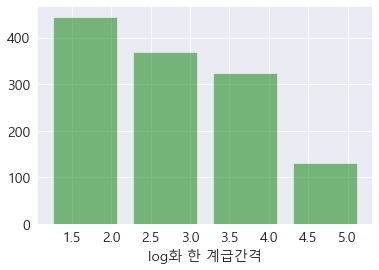

In [122]:
width = (max(all_data_bin['log_Fare']) - min(all_data_bin['log_Fare'])) / 5 #계급 간격 구하는 공식
print(f'width : {width}')
print(max(all_data_bin['log_Fare']))
print(min(all_data_bin['log_Fare']))
bins = np.arange(min(all_data_bin['log_Fare']), max(all_data_bin['log_Fare']), width)
hist, bins = np.histogram(all_data_bin['log_Fare'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(all_data_bin['log_Fare'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('log화 한 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [123]:
# 범주의 크기를 지정할 width 변수 설정

bins = np.arange(min(all_data_bin['log_Fare']), max(all_data_bin['log_Fare']), width)
print(bins)
hist, bins = np.histogram(all_data_bin['log_Fare'], bins)
width = len(bins)

# 범주의 최솟값(min)과 최댓값(max)을 계산
min_val = all_data_bin['log_Fare'].min()
max_val = all_data_bin['log_Fare'].max()

# 최솟값과 최댓값을 width 간격으로 나눠서 labels 배열 생성
labels = [f'{round(i,1)}' for i in bins]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
all_data_bin['Fare_binned'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels)
# train 데이터프레임 내용 확인
all_data_bin


[1.154 2.171 3.188 4.205 5.222]


,Pclass,Age,SibSp,Parch,Fare,log_Fare,Fare_binned
PassengerId,,,,,,,
1,3,22.0,1,0,7.2500,1.981001,1.2
2,1,38.0,1,0,71.2833,4.266662,4.2
3,3,26.0,0,0,7.9250,2.070022,1.2
4,1,35.0,1,0,53.1000,3.972177,3.2
5,3,35.0,0,0,8.0500,2.085672,1.2
...,...,...,...,...,...,...,...
1305,3,24.0,0,0,8.0500,2.085672,1.2
1306,1,39.0,0,0,108.9000,4.690430,4.2
1307,3,38.5,0,0,7.2500,1.981001,1.2


In [124]:
labels = [f"{bins[i]:.1f}~{bins[i+1]:.1f}" for i in range(len(bins)-1)]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
all_data_bin['Fare_binned_범위'] = pd.cut(all_data_bin['log_Fare'], bins=len(labels), labels=labels)
# train 데이터프레임 내용 확인
all_data_bin

,Pclass,Age,SibSp,Parch,Fare,log_Fare,Fare_binned,Fare_binned_범위
PassengerId,,,,,,,,
1,3,22.0,1,0,7.2500,1.981001,1.2,1.2~2.2
2,1,38.0,1,0,71.2833,4.266662,4.2,3.2~4.2
3,3,26.0,0,0,7.9250,2.070022,1.2,1.2~2.2
4,1,35.0,1,0,53.1000,3.972177,3.2,3.2~4.2
5,3,35.0,0,0,8.0500,2.085672,1.2,1.2~2.2
...,...,...,...,...,...,...,...,...
1305,3,24.0,0,0,8.0500,2.085672,1.2,1.2~2.2
1306,1,39.0,0,0,108.9000,4.690430,4.2,3.2~4.2
1307,3,38.5,0,0,7.2500,1.981001,1.2,1.2~2.2


In [125]:
print(all_data_bin['Fare_binned'].unique())

['1.2', '4.2', '3.2', '2.2', '5.2']
Categories (5, object): ['1.2' < '2.2' < '3.2' < '4.2' < '5.2']


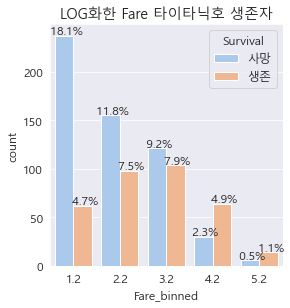

In [126]:
from matplotlib import gridspec

mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(10,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정
all_data_bin['Survival'] = train['Survived'].map({0: '사망', 1: '생존'})
# 서브플롯 그리기# 피처 목록

for idx, feature in enumerate(['Fare_binned']) :

    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data = all_data_bin , hue = 'Survival' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'LOG화한 Fare 타이타닉호 생존자') # 그래프 제목 설정
    write_percent(ax, len(all_data_bin))



In [127]:
bins_exp = np.exp(bins)
bins_exp

array([  3.171,   8.767,  24.239,  67.019, 185.299])

### 'AGE' 계급간격 구하기

In [128]:
all_data_bin['Age'].describe()

count    1309.000000
mean       28.699519
std        13.097097
min         0.170000
25%        22.000000
50%        24.000000
75%        35.000000
max        80.000000
Name: Age, dtype: float64

[ 56  30  29 133 458 166 115  95  72  60  36  26  23   4   4]
[ 0.17  5.17 10.17 15.17 20.17 25.17 30.17 35.17 40.17 45.17 50.17 55.17
 60.17 65.17 70.17 75.17]


(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text major ticklabel objects>)

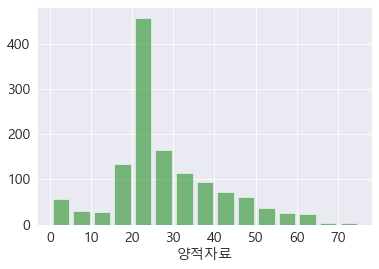

In [129]:
bins = np.arange(min(all_data_bin['Age']), max(all_data_bin['Age']), width)


hist, bins = np.histogram(all_data_bin['Age'], bins)
print(hist)
print(bins)

plt.hist(all_data_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('양적자료' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)



### 분포가 생각보다 일정해서 log 화 안해도 될거 같다.
---

### 대신 간격의 수를 줄여야 겠다. 10대 20대 30대 이런식으로 하는것이 좋을 거 같다.

- describe()에서 최대값이 80살 , 최소값이 0살이므로 10개의 계급간격을 나누면 좋을거 같다.

width : 7.983
80.0
0.17
hist : [ 82 143 607 232 135  70  32   8]
bins : [ 0 10 20 30 40 50 60 70 80]


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text major ticklabel objects>)

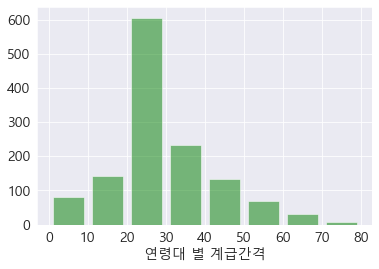

In [130]:
width = (max(all_data_bin['Age']) - min(all_data_bin['Age'])) / 10 #계급 간격 구하는 공식

# width = np.arange(0,90,10)

print(f'width : {width}')
print(max(all_data_bin['Age']))
print(min(all_data_bin['Age']))
bins = np.arange(0,90,10)
hist, bins = np.histogram(all_data_bin['Age'], bins)
print(f'hist : {hist}')
print(f'bins : {bins}')

plt.hist(all_data_bin['Age'], bins , rwidth = 0.8 , color = 'green' , alpha = 0.5)
plt.xlabel('연령대 별 계급간격' , fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [131]:
labels = [f'{i}' for i in bins]

# train['Fare'] 값을 labels에 맞게 범주형으로 변환
all_data_bin['Age_Categorical'] = pd.cut(all_data_bin['Age'], bins=len(labels), labels=labels)
# train 데이터프레임 내용 확인
all_data_bin

,Pclass,Age,SibSp,Parch,Fare,log_Fare,Fare_binned,Fare_binned_범위,Survival,Age_Categorical
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,1.981001,1.2,1.2~2.2,사망,20
2,1,38.0,1,0,71.2833,4.266662,4.2,3.2~4.2,생존,40
3,3,26.0,0,0,7.9250,2.070022,1.2,1.2~2.2,생존,20
4,1,35.0,1,0,53.1000,3.972177,3.2,3.2~4.2,생존,30
5,3,35.0,0,0,8.0500,2.085672,1.2,1.2~2.2,사망,30
...,...,...,...,...,...,...,...,...,...,...
1305,3,24.0,0,0,8.0500,2.085672,1.2,1.2~2.2,NaN,20
1306,1,39.0,0,0,108.9000,4.690430,4.2,3.2~4.2,NaN,40
1307,3,38.5,0,0,7.2500,1.981001,1.2,1.2~2.2,NaN,40


In [132]:
age_cat_with_daes = all_data_bin['Age_Categorical'].apply(lambda x: str(x)+'대')

# train_bin['Age_Categorical'] 열 대체
all_data_bin['Age_Categorical'] = age_cat_with_daes

all_data_bin

,Pclass,Age,SibSp,Parch,Fare,log_Fare,Fare_binned,Fare_binned_범위,Survival,Age_Categorical
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,1.981001,1.2,1.2~2.2,사망,20대
2,1,38.0,1,0,71.2833,4.266662,4.2,3.2~4.2,생존,40대
3,3,26.0,0,0,7.9250,2.070022,1.2,1.2~2.2,생존,20대
4,1,35.0,1,0,53.1000,3.972177,3.2,3.2~4.2,생존,30대
5,3,35.0,0,0,8.0500,2.085672,1.2,1.2~2.2,사망,30대
...,...,...,...,...,...,...,...,...,...,...
1305,3,24.0,0,0,8.0500,2.085672,1.2,1.2~2.2,NaN,20대
1306,1,39.0,0,0,108.9000,4.690430,4.2,3.2~4.2,NaN,40대
1307,3,38.5,0,0,7.2500,1.981001,1.2,1.2~2.2,NaN,40대


In [133]:
all_data_bin.columns.tolist()

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'log_Fare',
 'Fare_binned',
 'Fare_binned_범위',
 'Survival',
 'Age_Categorical']

In [134]:
all_data_bin2 = all_data_bin[['Pclass' ,'SibSp','Parch' ,'Survival' , 'Fare_binned_범위' , 'Age_Categorical']]
all_data_bin2

,Pclass,SibSp,Parch,Survival,Fare_binned_범위,Age_Categorical
PassengerId,,,,,,
1,3,1,0,사망,1.2~2.2,20대
2,1,1,0,생존,3.2~4.2,40대
3,3,0,0,생존,1.2~2.2,20대
4,1,1,0,생존,3.2~4.2,30대
5,3,0,0,사망,1.2~2.2,30대
...,...,...,...,...,...,...
1305,3,0,0,NaN,1.2~2.2,20대
1306,1,0,0,NaN,3.2~4.2,40대
1307,3,0,0,NaN,1.2~2.2,40대


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


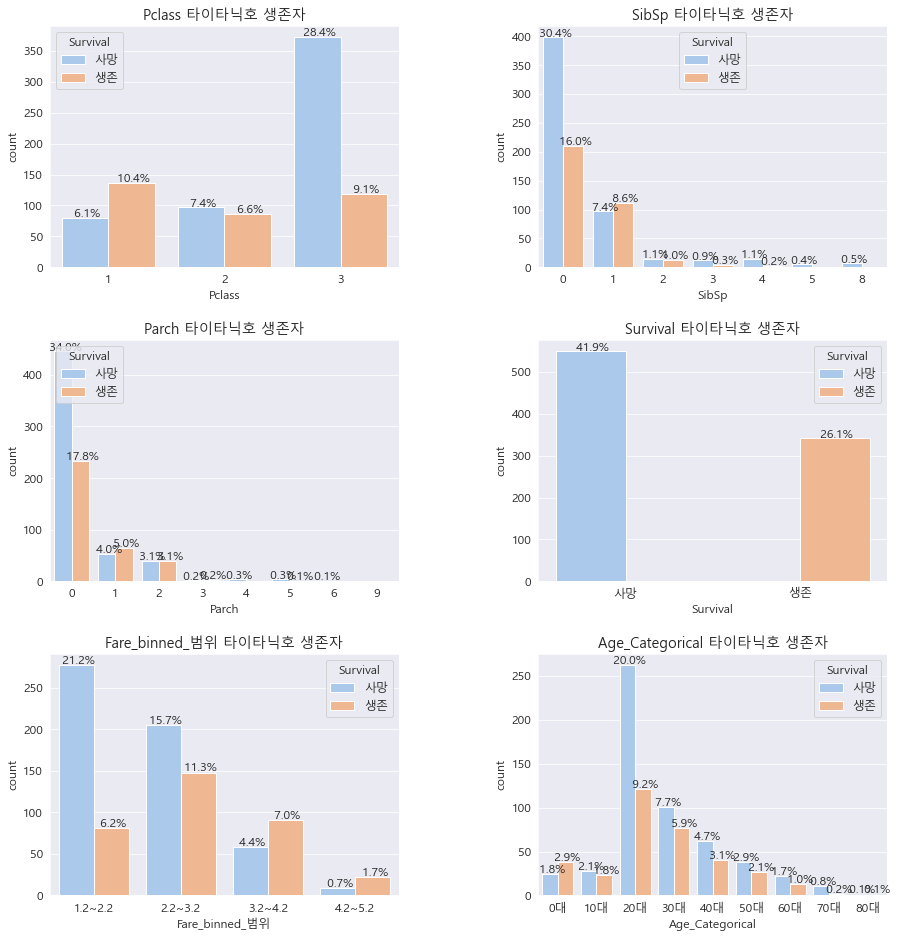

In [135]:
# 3행 2열
mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(3,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(15,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기# 피처 목록

for idx, feature in enumerate(all_data_bin2.columns.tolist()) :

    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data = all_data_bin2 , hue = 'Survival' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'{feature} 타이타닉호 생존자') # 그래프 제목 설정
    write_percent(ax, len(all_data_bin2))



# binary_col은 2진 피처가 아니다. 명목형 피처라 해도 될거 같다.

## train_bin 에는 log 화밑 계급화 시킨 값들 모두 포함 시켰다.

## train_bin2 로 train 데이터로 활용하면 좋을 수 도 있겠다.


---

## 명목형 피처 전처리를 해보자

In [136]:
all_data_obj

,Name,Sex,Ticket,Embarked
PassengerId,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
5,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
1305,"Spector, Mr. Woolf",male,A.5. 3236,S
1306,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C
1307,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,S


## 내 생각엔 Name은 필요 없을 거 같고 , 'Sex'와 'Embarked' 만 필요할거 같다.

In [137]:
all_data_obj = all_data_obj[['Sex' , 'Embarked']]
all_data_obj

,Sex,Embarked
PassengerId,,
1,male,S
2,female,C
3,female,S
4,female,S
5,male,S
...,...,...
1305,male,S
1306,female,C
1307,male,S


In [138]:
all_data_obj2 =  pd.merge(all_data_obj, all_data_bin2['Survival'] , how='outer' , on=('PassengerId'))
all_data_obj2

,Sex,Embarked,Survival
PassengerId,,,
1,male,S,사망
2,female,C,생존
3,female,S,생존
4,female,S,생존
5,male,S,사망
...,...,...,...
1305,male,S,NaN
1306,female,C,NaN
1307,male,S,NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


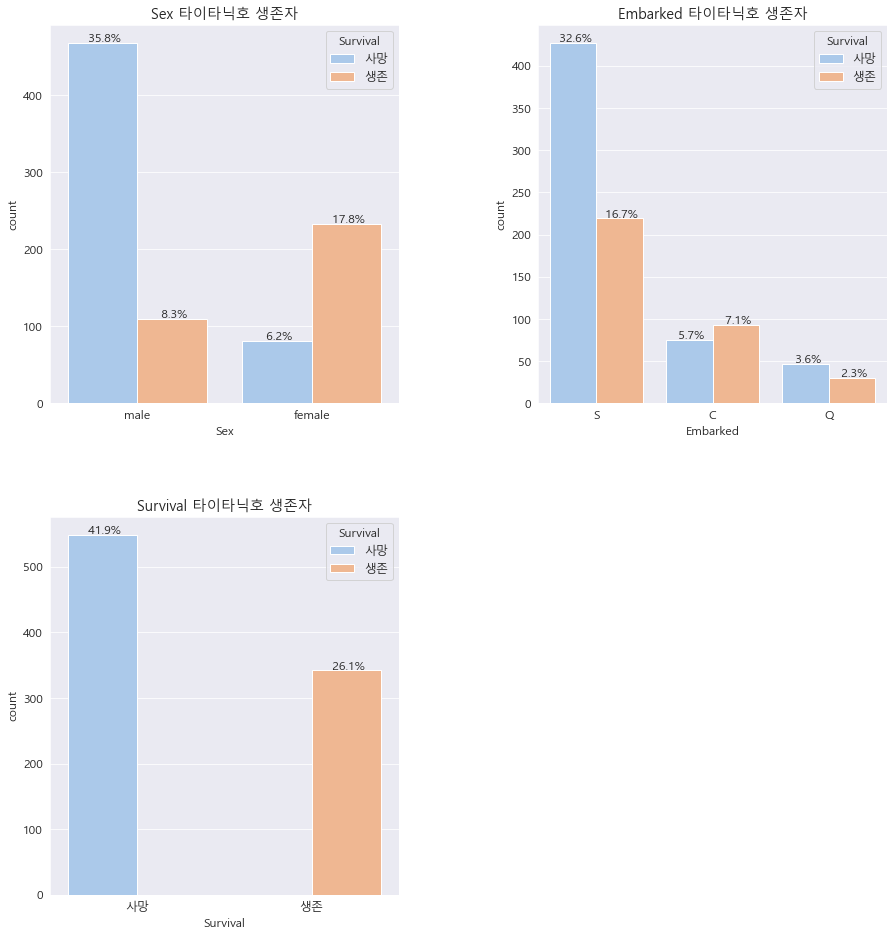

In [139]:
# 3행 2열
mpl.rc('font' , size = 12)
grid = gridspec.GridSpec(2,2) # 그래프(서브플롯)을 3행 2열로 배치
plt.figure(figsize=(15,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace= 0.4 , hspace= 0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기# 피처 목록

for idx, feature in enumerate(all_data_obj2.columns.tolist()) :

    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature , data =all_data_obj2 , hue = 'Survival' , palette = 'pastel' , ax= ax)
    # hue는 세부적으로 나눠 그릴 기준 피처, 여기서는 타깃값(target)을 전달했다.
    ax.set_title(f'{feature} 타이타닉호 생존자') # 그래프 제목 설정
    write_percent(ax, len(all_data_obj2))


In [149]:
all_data2 = pd.merge(all_data_obj , all_data_bin2, how='outer' , on=('PassengerId'))

all_data2 = all_data2[['Sex' , 'Embarked' , 'Pclass' ,'SibSp' , 'Parch' , 'Fare_binned_범위' , 'Age_Categorical']]

all_data2

,Sex,Embarked,Pclass,SibSp,Parch,Fare_binned_범위,Age_Categorical
PassengerId,,,,,,,
1,male,S,3,1,0,1.2~2.2,20대
2,female,C,1,1,0,3.2~4.2,40대
3,female,S,3,0,0,1.2~2.2,20대
4,female,S,1,1,0,3.2~4.2,30대
5,male,S,3,0,0,1.2~2.2,30대
...,...,...,...,...,...,...,...
1305,male,S,3,0,0,1.2~2.2,20대
1306,female,C,1,0,0,3.2~4.2,40대
1307,male,S,3,0,0,1.2~2.2,40대


## 모델링

In [150]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder() # 원-핫 인코더 생성

all_data_encoded = encoder.fit_transform(all_data2)

all_data_encoded

<1309x36 sparse matrix of type '<class 'numpy.float64'>'
	with 9163 stored elements in Compressed Sparse Row format>

In [151]:
num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X_train = all_data_encoded[:num_train] # 0~num_train -1 행
X_test = all_data_encoded[num_train:] # num_train ~ 마지막 행

y = train['Survived']

In [152]:
from sklearn.model_selection import train_test_split

# 훈련 데이터 , 검증 데이터 분리

X_train , X_valid , y_train , y_valid = train_test_split(X_train , y , test_size=0.1 , stratify=y,random_state=10)

# test_size 는 검증 데이터 크기를 지정하는 파라미터이다.
# 값이 정수면 검증 데이터의 개수를 , 실수면 비율을 의미한다. 여기서는 0.1을 전달했으므로 10%를 검증 데이터로 분리하겠다는 의미이다.

# stratify 파라미터를 지정하지 않으면 훈련 데이터와 검증 데이터에 타깃값이 불균형하게 분포 될 수 있다.

In [153]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 1000 , random_state=42)
logistic_model.fit(X_train,y_train) # 모델 훈련

LogisticRegression(max_iter=1000, random_state=42)

In [154]:
logistic_model.predict(X_valid)

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [155]:
# 검증 데이터를 활용한 타깃 예측

y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]
from sklearn.metrics import roc_auc_score  # ROC AUC 점수 계산 함수

# 검증 데이터 ROC AUC

roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'검증 데이터 ROC AUC : {roc_auc:.4f}')
# 타깃값 1일 확룰 예측

y_preds = logistic_model.predict(X_test)
y_preds

검증 데이터 ROC AUC : 0.8629


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [156]:
# 제출 파일 생성

submission['Survived'] = y_preds
submission.to_csv('submission_3.csv')